In [207]:
import keras
import skimage
import matplotlib.pyplot as plt
import numpy as np

In [208]:
model = keras.saving.load_model("colorization.keras")

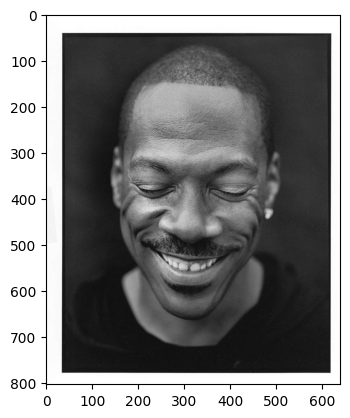

In [209]:
img = skimage.io.imread("eddie bw.jpg", as_gray=True)
img = (img/(np.max(img) - np.min(img)))*100
plt.imshow(img, cmap="gray")

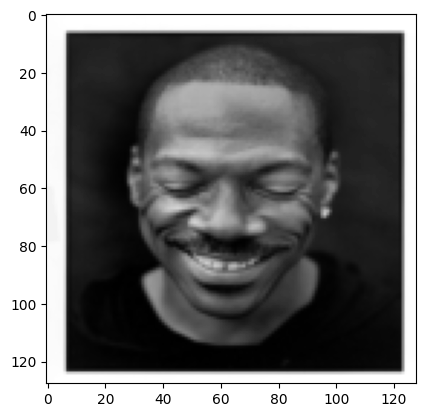

In [210]:
img_resized = skimage.transform.resize(img, (128, 128))
plt.imshow(img_resized, cmap="gray")

In [211]:
ab_predict = model.predict(np.array([img_resized]), batch_size=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


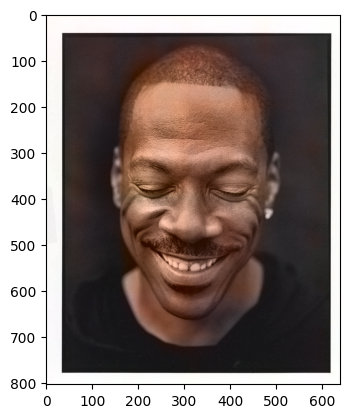

In [212]:
def rassembler_L_et_ab(L, ab):
    a = ab[:,:,0]
    b = ab[:,:,1]
    return skimage.color.lab2rgb(np.stack([L, a, b], axis=2))

plt.imshow(rassembler_L_et_ab(img, skimage.transform.resize(ab_predict[0], img.shape[:2])))